In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd

In [3]:
with open("test_qa-220120-145430.txt","rb") as fp:
    test_data=pickle.load(fp)

In [4]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [8]:
with open("train_qa-220120-145526.txt","rb") as fp:
    train_data=pickle.load(fp)

In [9]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [10]:
type(test_data)

list

In [11]:
type(train_data)

list

In [12]:
len(test_data)

1000

In [13]:
len(train_data)

10000

In [14]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [15]:
' '.join(train_data[0][0]) #stry

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [16]:
' '.join(train_data[0][1]) #quest

'Is Sandra in the hallway ?'

In [17]:
train_data[0][2] #ans

'no'

In [18]:
#set vocab all words
vocab=set()

In [19]:
all_data=test_data+train_data

In [20]:
type(all_data)

list

In [21]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [22]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [23]:
vocab.add("yes")
vocab.add("no")

In [24]:
len(vocab)

37

In [25]:
vocab_len=len(vocab)+1

In [26]:
max_story_len=max([len(data[0])for data in all_data])
max_story_len

156

In [27]:
max_ques_len=max([len(data[1])for data in all_data])
max_ques_len

6

In [28]:
#vectorize o convert in num form
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [29]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer=Tokenizer(filters=[])

In [31]:
tokenizer.fit_on_texts(vocab)

In [32]:
tokenizer.word_index

{'garden': 1,
 'office': 2,
 'bedroom': 3,
 '?': 4,
 'discarded': 5,
 'apple': 6,
 'there': 7,
 'john': 8,
 'kitchen': 9,
 'travelled': 10,
 'went': 11,
 'milk': 12,
 'took': 13,
 'football': 14,
 'daniel': 15,
 'down': 16,
 'left': 17,
 'yes': 18,
 'got': 19,
 'moved': 20,
 'up': 21,
 'mary': 22,
 'to': 23,
 'back': 24,
 'sandra': 25,
 'in': 26,
 'the': 27,
 'dropped': 28,
 '.': 29,
 'picked': 30,
 'journeyed': 31,
 'no': 32,
 'bathroom': 33,
 'is': 34,
 'grabbed': 35,
 'put': 36,
 'hallway': 37}

In [33]:
train_story_text=[]
train_question_text=[]
train_answers=[]
for story,question,answers in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [34]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [35]:
len(train_story_text)

10000

In [36]:
len(train_question_text)

10000

In [37]:
train_story_seq

[[22, 20, 23, 27, 33, 29, 25, 31, 23, 27, 3, 29],
 [22,
  20,
  23,
  27,
  33,
  29,
  25,
  31,
  23,
  27,
  3,
  29,
  22,
  11,
  24,
  23,
  27,
  3,
  29,
  15,
  11,
  24,
  23,
  27,
  37,
  29],
 [22,
  20,
  23,
  27,
  33,
  29,
  25,
  31,
  23,
  27,
  3,
  29,
  22,
  11,
  24,
  23,
  27,
  3,
  29,
  15,
  11,
  24,
  23,
  27,
  37,
  29,
  25,
  11,
  23,
  27,
  9,
  29,
  15,
  11,
  24,
  23,
  27,
  33,
  29],
 [22,
  20,
  23,
  27,
  33,
  29,
  25,
  31,
  23,
  27,
  3,
  29,
  22,
  11,
  24,
  23,
  27,
  3,
  29,
  15,
  11,
  24,
  23,
  27,
  37,
  29,
  25,
  11,
  23,
  27,
  9,
  29,
  15,
  11,
  24,
  23,
  27,
  33,
  29,
  15,
  30,
  21,
  27,
  14,
  7,
  29,
  15,
  11,
  23,
  27,
  3,
  29],
 [22,
  20,
  23,
  27,
  33,
  29,
  25,
  31,
  23,
  27,
  3,
  29,
  22,
  11,
  24,
  23,
  27,
  3,
  29,
  15,
  11,
  24,
  23,
  27,
  37,
  29,
  25,
  11,
  23,
  27,
  9,
  29,
  15,
  11,
  24,
  23,
  27,
  33,
  29,
  15,
  30,
  21,
  27,


In [38]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [39]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_stroy_len=max_story_len,max_ques_len=max_ques_len):
    X=[] # stories
    Xq=[] #quest
    Y=[] #answer
    for story,query,answer in data:
        
        x=[word_index[word.lower()]for word in story]
        xq=[word_index[word.lower()]for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X,maxlen=max_story_len),
            pad_sequences(Xq,maxlen=max_ques_len),
            np.array(Y))


In [40]:
inputs_train, queries_train, answers_train=vectorize_stories(train_data)

In [41]:
inputs_test, queries_test, answers_test=vectorize_stories(test_data)

In [42]:
inputs_train

array([[ 0,  0,  0, ..., 27,  3, 29],
       [ 0,  0,  0, ..., 27, 37, 29],
       [ 0,  0,  0, ..., 27, 33, 29],
       ...,
       [ 0,  0,  0, ..., 27,  3, 29],
       [ 0,  0,  0, ..., 12,  7, 29],
       [ 0,  0,  0, ...,  6,  7, 29]])

In [43]:
queries_train

array([[34, 25, 26, 27, 37,  4],
       [34, 15, 26, 27, 33,  4],
       [34, 15, 26, 27,  2,  4],
       ...,
       [34, 25, 26, 27, 37,  4],
       [34, 22, 26, 27,  9,  4],
       [34, 22, 26, 27,  3,  4]])

In [44]:
queries_test

array([[34,  8, 26, 27,  9,  4],
       [34,  8, 26, 27,  9,  4],
       [34,  8, 26, 27,  1,  4],
       ...,
       [34, 22, 26, 27,  3,  4],
       [34, 25, 26, 27,  1,  4],
       [34, 22, 26, 27,  1,  4]])

In [45]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
tokenizer.word_index['yes']

18

In [47]:
tokenizer.word_index['no']

32

In [48]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [49]:
input_sequence=Input((max_story_len,))
question=Input((max_ques_len,))

In [50]:
#input encoder m
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [51]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [52]:
#quest and encoder
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [53]:
input_encoded_m= input_encoder_m(input_sequence)

input_encoded_c= input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [54]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [55]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [56]:
#concatenate
answer=concatenate([response,question_encoded])

In [57]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [58]:
answer=LSTM(32)(answer)

In [59]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [60]:
answer=Activation('softmax')(answer)

In [61]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [63]:
history=model.fit([inputs_train,queries_train],answers_train,
                  batch_size=32,epochs=20,
                  validation_data=([inputs_test,queries_test],answers_test)
                 )

Epoch 1/20
313/313 [==============================] - 13s 24ms/step - loss: 0.9159 - accuracy: 0.5034 - val_loss: 0.6941 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 0.7039 - accuracy: 0.5039 - val_loss: 0.6962 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6963 - accuracy: 0.5017 - val_loss: 0.6941 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6948 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6944 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6947 - accuracy: 0.4982 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6948 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.503

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

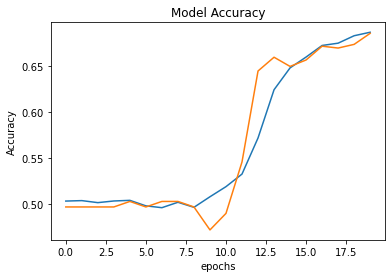

In [64]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")

In [65]:
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [66]:
model.load_weights("chatbot_model")

In [67]:
pred_results=model.predict(([inputs_test,queries_test]))

In [68]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [69]:
story=' '.join(word for word in test_data[0][0])

In [70]:
story

'Mary got the milk there . John moved to the bedroom .'

In [71]:
query=' '.join(word for word in test_data[0][1])

In [72]:
query

'Is John in the kitchen ?'

In [71]:
test_data[0][2]

'no'

In [72]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted Answer is",k)
print("Probablity of certainity",pred_results[0][val_max])

Predicted Answer is no
Probablity of certainity 0.78277284


In [73]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [74]:
story="Mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [75]:
my_question="Is apple in the kitchen ?"



In [76]:
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [77]:
mydata=[(story.split(),my_question.split(),'yes')]

In [78]:
my_story,my_ques,my_ans=vectorize_stories(mydata)

In [79]:
pred_results=model.predict(([my_story,my_ques]))

In [80]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted Answer is",k)
print("Probablity of certainity",pred_results[0][val_max])

Predicted Answer is yes
Probablity of certainity 0.5723059
